# MATH 4340 / COSC 4340: Numerical Methods for Differential Equations
# Notebook 6: General Multistep Methods and Stability

### Professor: Dane Taylor
### Date: Spring 2024


In [46]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. 2nd order Adams-Bashforth method

In [47]:
def forward_Euler(ti,f,y0): 
    
    h = ti[1]-ti[0]
    N = len(ti)-1
    yi = zeros(len(ti))
    yi[0] = y0
    for i in range(N):
        yi[i+1] = yi[i] + h*f(ti[i],yi[i])
    return yi

In [59]:
def AB2(tn,f,y0,y1):
    
    N = len(tn)-1 # number of time steps
    h = tn[1]-tn[0] # step size
    
    yn = zeros(len(tn)) # allocate memory for yi values
    yn[0] = y0 # initial condition 1
    yn[1] = y1 # initial condition 2
    
    for i in range(N-1):        
        yn[i+2] =  yn[i+1] + (h/2)*( 3*f(tn[i+1],yn[i+1]) - f(tn[i],yn[i]) )

    return yn

In [49]:
def f(t,y): return 2*y
def true_soln(t): return exp(2*t)


y0,t0,T,N = 1,0,1,100
ti = linspace(t0,T,N+1)
y1 = true_soln(ti[1])

yi_AB2 = AB2(ti,f,y0,y1)
yi = forward_Euler(ti,f,y0)

local_error_FE_100 =  abs(true_soln(ti)-yi)[1]
local_error_AB2_100 =  abs(true_soln(ti)-yi_AB2)[3]

global_error_FE_100 =  abs(true_soln(ti)-yi)[-1]
global_error_AB2_100 =  abs(true_soln(ti)-yi_AB2)[-1]

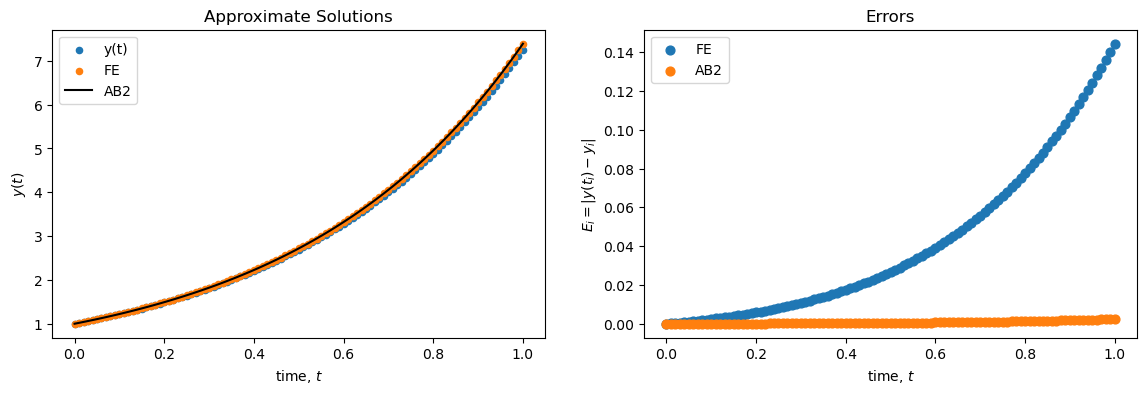

In [67]:
def make_AB2_fig(ti,yi,yi2,true_soln):
    
    fig, ax = plt.subplots(1,2,figsize=(14,4))
    
    ax[0].scatter(ti,yi,20);
    ax[0].scatter(ti,yi2,20);    
    ax[0].plot(ti,true_soln(ti),'k');  
    
    ax[0].set_xlabel('time, $t$');
    ax[0].set_ylabel('$y(t)$');
    ax[0].legend(['y(t)','FE','AB2','$y(t)$']);
    ax[0].set_title('Approximate Solutions');
    
    ax[1].scatter(ti,abs(true_soln(ti)-yi),40);
    ax[1].scatter(ti,abs(true_soln(ti)-yi2),40);
    ax[1].set_title('Errors');
    ax[1].set_xlabel('time, $t$');
    ax[1].set_ylabel('$E_i = |y(t_i)-y_i|$');
    ax[1].legend(['FE','AB2']);

make_AB2_fig(ti,yi,yi_AB2,true_soln)

In [51]:
y0,t0,T,N = 1,0,1,1000
ti = linspace(t0,T,N+1)
y1 = true_soln(ti[1])

yi_AB2 = AB2(ti,f,y0,y1)
yi = forward_Euler(ti,f,y0)

In [52]:
local_error_FE_1000 =  abs(true_soln(ti)-yi)[1]
local_error_AB2_1000 =  abs(true_soln(ti)-yi_AB2)[3]

global_error_FE_1000 =  abs(true_soln(ti)-yi)[-1]
global_error_AB2_1000 =  abs(true_soln(ti)-yi_AB2)[-1]

In [53]:
print('Forward Euler')
print(local_error_FE_100/local_error_FE_1000)
print(global_error_FE_100/global_error_FE_1000)

Forward Euler
100.60291122094846
9.794684962298767


### For forward Euler, $e_1 = \mathcal{O}(h)^2$ and $E_N = \mathcal{O}(h)$
* if $h$ decreases by a factor of 10
* then $e_1$ decreases by a factor of 100 
* and $E_N$ decreases by a factor of 10


In [60]:
print('2nd order Adams-Bashforth')
print(local_error_AB2_100/local_error_AB2_1000)
print(global_error_AB2_100/global_error_AB2_1000)

2nd order Adams-Bashforth
1039.2701300947826
97.97842644893366



### For the 2nd order Adams-Bashforth, $e_1 = \mathcal{O}(h)^3$ and $E_N = \mathcal{O}(h^2)$
* if $h$ decreases by a factor of 10
* then $e_1$ decreases by a factor of 1000
* and $E_N$ decreases by a factor of 100

### 2. Compare to other 2nd order Adams-Bashforth methods

In [55]:
def AB2_b(tn,f,y0,y1):
    
    N = len(tn)-1 # number of time steps
    h = tn[1]-tn[0] # step size
    
    yn = zeros(len(tn)) # allocate memory for yi values
    yn[0] = y0 # initial condition 1
    yn[1] = y1 # initial condition 2
    
    for i in range(N-1):        
        yn[i+2] =  -1*yn[i+1] + 3*yn[i] + (h/2)*( 5*f(tn[i+1],yn[i+1]) + f(tn[i],yn[i]) )

    return yn

def AB2_bb(tn,f,y0,y1):
    
    N = len(tn)-1 # number of time steps
    h = tn[1]-tn[0] # step size
    
    yn = zeros(len(tn)) # allocate memory for yi values
    yn[0] = y0 # initial condition 1
    yn[1] = y1 # initial condition 2
    
    for i in range(N-1):        
        yn[i+2] =  .5*yn[i+1] + .5*yn[i] + (h/4)*( 7*f(tn[i+1],yn[i+1]) - f(tn[i],yn[i]) )

    return yn

In [56]:
y0,t0,T,N = 1,0,1,100
ti = linspace(t0,T,N+1)
y1 = true_soln(ti[1])

yi_AB2_b = AB2_b(ti,f,y0,y1)
yi_AB2_bb = AB2_bb(ti,f,y0,y1)
yi = forward_Euler(ti,f,y0)

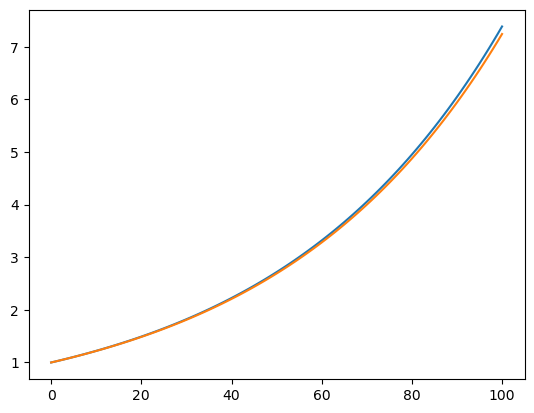

In [57]:
plot(yi_AB2_bb)
plot(yi)

(-1000.0, 1000.0)

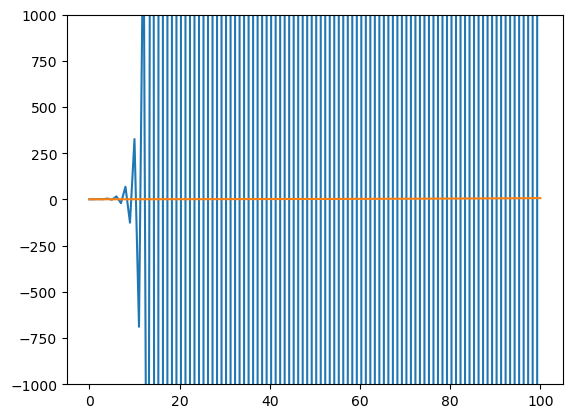

In [70]:
plot(yi_AB2_b)
plot(yi)
ylim([-1000,1000])

#### The unstable method blows up

### 3. 3-step Adams-Bashforth method

In [62]:

def AB3(tn,f,y0,y1,y2):
    
    N = len(tn)-1 # number of time steps
    h = tn[1]-tn[0] # step size
    
    yn = zeros(len(tn)) # allocate memory for yi values
    # Adams-Basforth 3 requires 3 initital conditions
    yn[0] = y0 # initial condition 1
    yn[1] = y1 # initial condition 2
    yn[2] = y2 # initial condition 3
    
    for i in range(N-2):        
        yn[i+3] =  yn[i+2] + (h/12)*( 23*f(tn[i+2],yn[i+2]) - 16*f(tn[i+2],yn[i+1]) +5*f(tn[i],yn[i]) )

    return yn


In [63]:
y0,t0,T,N = 1,0,1,100
ti = linspace(t0,T,N+1)
y1,y2 = true_soln(ti[1]),true_soln(ti[2])

yi_AB2 = AB2(ti,f,y0,y1)
yi_AB3 = AB3(ti,f,y0,y1,y2)

local_error_AB2_100 =  abs(true_soln(ti)-yi_AB2)[3]
local_error_AB3_100 =  abs(true_soln(ti)-yi_AB3)[4]

global_error_AB2_100 =  abs(true_soln(ti)-yi_AB2)[-1]
global_error_AB3_100 =  abs(true_soln(ti)-yi_AB3)[-1]

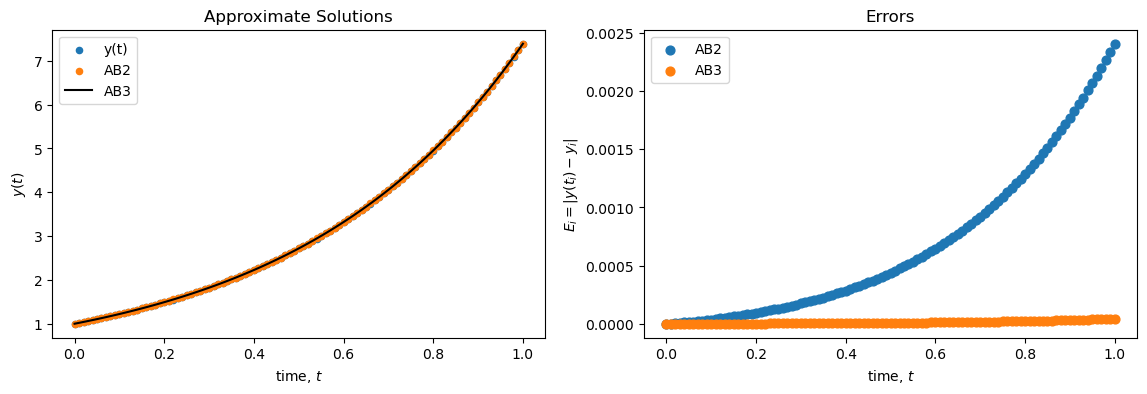

In [64]:
def make_AB_fig(ti,yi,yi2,true_soln):
    
    fig, ax = plt.subplots(1,2,figsize=(14,4))
    
    ax[0].scatter(ti,yi,20);
    ax[0].scatter(ti,yi2,20);    
    ax[0].plot(ti,true_soln(ti),'k');  
    
    ax[0].set_xlabel('time, $t$');
    ax[0].set_ylabel('$y(t)$');
    ax[0].legend(['y(t)','AB2','AB3','$y(t)$']);
    ax[0].set_title('Approximate Solutions');
    
    ax[1].scatter(ti,abs(true_soln(ti)-yi),40);
    ax[1].scatter(ti,abs(true_soln(ti)-yi2),40);
    ax[1].set_title('Errors');
    ax[1].set_xlabel('time, $t$');
    ax[1].set_ylabel('$E_i = |y(t_i)-y_i|$');
    ax[1].legend(['AB2','AB3']);

make_AB_fig(ti,yi_AB2,yi_AB3,true_soln)